#Importando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [5]:
from keras.utils.vis_utils import plot_model

In [6]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

#Carregando os dados

In [12]:
X = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_feats_e3.csv")
y = pd.read_csv("https://raw.githubusercontent.com/jrandrade07/DataSets/main/OSI_target_e2.csv")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modelo Sequencial

In [8]:
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(Dense(4, input_dim=1))
model.add(Dense(1))

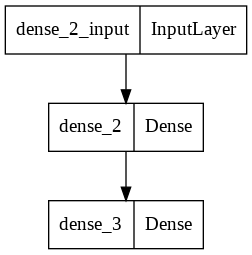

In [14]:
plot_model(model)

# Construindo um Modelo

In [19]:
# 2. Definir o modelo
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
X.shape[1]

68

In [ ]:
model.summary()

In [ ]:
# 3. Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 4. Ajustar o modelo aos dados
model.fit(X, y, epochs=150, batch_size=10)

In [ ]:
# 5. Avaliar o modelo
_, accuracy = model.evaluate(X, y)
print('Acurácia: %.2f' % (accuracy*100))

In [ ]:
# 6. Fazer predições
pred = (model.predict(X) > 0.5).astype("int32")

In [ ]:
for i in range(10):
  print('%s (real: %d | predito: %d)' % (X[i].tolist(), y[i], pred[i]))

# Modelos Pré-treinados

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
img_path = 'resnet50.jpg'
img = Image.open(img_path)
imshow(np.asarray(img))

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predito:', decode_predictions(preds, top=3)[0])